<a href="https://colab.research.google.com/github/faruk70100/Football-Player-Data-Analysis/blob/main/GlobalAIDataAnalyze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Libraries**

In [1]:
#Importing libraries that needed
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

#Panda libraries settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### **Load and Check Data**
  Bu Veri Football Manager 2023 isimli gerçek tabanlı simülasyon oyunundan çekilmiştir ve kaggle da paylaşılmıştır. verinin Kaggle linki aşağıdadır.
  https://www.kaggle.com/datasets/ultimus/football-salaries-dataset/data

In [2]:
df = pd.read_csv("raw_wages.csv")

### **Reviewing The Dataset**

In [3]:
def check_df(dataframe):
  print("Shape of dataset: ", dataframe.shape)
  print("\n \tColumns names \n")
  print(dataframe.columns)
  print("\n \tInfo of data \n")
  dataframe.info()
  print("\n \t Types")
  print(dataframe.dtypes)
  print("\n \t Top 5 lines of Dataframe \n")
  print(dataframe.head())
  print("\n \t Bottom 5 lines of Dataframe \n")
  print(dataframe.tail())
  print("\n \t NA \n")
  print(dataframe.isnull().sum())

In [4]:
check_df(df)

Shape of dataset:  (40791, 16)

 	Columns names 

Index(['Name', 'Club', 'Division', 'Based', 'Nat', 'EU National', 'Caps', 'AT Apps', 'Position',
       'Age', 'CR', 'Begins', 'Expires', 'Last Club', 'Last Trans. Fee', 'Salary'],
      dtype='object')

 	Info of data 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40791 entries, 0 to 40790
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             40791 non-null  object 
 1   Club             40791 non-null  object 
 2   Division         40791 non-null  object 
 3   Based            40791 non-null  object 
 4   Nat              40791 non-null  object 
 5   EU National      40791 non-null  object 
 6   Caps             40791 non-null  float64
 7   AT Apps          40791 non-null  object 
 8   Position         40791 non-null  object 
 9   Age              40791 non-null  float64
 10  CR               40791 non-null  object 
 11  Begins           

In [5]:
df.describe()

,Caps,Age
count,40791.000,40791.000
mean,5.144,25.178
std,13.666,5.328
min,0.000,17.000
25%,0.000,21.000
50%,0.000,25.000
75%,3.000,29.000
max,200.000,45.000


# **Columns Description**

*   **Name:** Futbolcunun isimlerinin barındığı sütun  
*   **Club:** Futbolcunun verinin alındığı 2022 Eylül ayında bulunduğu kulüp isimlerinin olduğu sütun
*   **Division:** Kulübün bulunduğu lig isimlerinin olduğu sütun
*   **Based:** Ligin bulunduğu ülke ve kaçıncı seviyede oluğunu belirten sütun
*   **Nat:** Futbolcunun hangi ülke vatandaşı olduğunu belirten sütun
*   **EU National:** Futbolcu avrupa liglerinde oynamaya izni olup olmadığını belirten sütun
*   **Caps:** Futbolcunun uluslararası kaç maça çıktığını gösteren sütun
*   **AT Apps:** Futbolcunun toplam da kaç maça çıktığını gösteren sütun
*   **Position:** Futbolcunun hangi pozisyonlarda oynadığını gösteren sütun
*   **Age:** Futbolcunun yaşının olduğu sütun
*   **CR:** Futbolcunun anlık popülerliği yazan sutün(0 en yüksek popülerlik ve 10000 en düşük olacak şekilde ölçeklendirilmiştir.)
*   **Begins:** Futbolcunun 2022 eylül ayında bulunduğu kulüp ile sözleşmesinin başlangıç tarihi olan sutün (ek bilgi: bu sutün da 2021'den önce bir tarihte olabilir)
*   **Expires:** Futbolcunun 2022 eylül ayında bulunduğu kulüp ile sözleşmesinin bitiş tarihi olan sutün
*   **Last Club:** Futbolcunun 2022 eylül ayında bulunduğu takıma hangi takımdan transfer olduğunu gösteren sutün
*   **Last Trans. Fee:** Futbolcunun en son transfer ücreti olan sutündur.
*   **Salary:** Futbolcunun 2022 eylül ayında aktif olan sözleşmesindeki EURO cinsinden yıllık ücreti buluduğu sutün

# **Variable Analysis**

*   **Categorical Variable:** Name, Club, EU National, Position
*   **Categorical with High Cardinality** Division, Based, Nat, AT Apps, CR, Begins, Expires, Last Club, Last Trans. Fee, Salary
*   **Numerical Variable:** Caps, Age

In [6]:
def column_detection(dataframe: pd.DataFrame, cat_th: int = 15, car_th: int = 50):
    categ_column = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    numeric_but_categ = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                       dataframe[col].dtypes != "O"]
    categ_with_HIGHcardinal = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                    dataframe[col].dtypes == "O"]
    categ_column = categ_column + numeric_but_categ
    categ_column = [col for col in categ_column if col not in categ_with_HIGHcardinal]

    # num_cols
    numeric_column = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numeric_column = [col for col in numeric_column if col not in numeric_but_categ]

    print("\n \t Categoric\n")
    print(categ_column)
    print("\n \t Numeric \n")
    print(numeric_column)
    print("\n \t Categoric But Cardinal \n")
    print(categ_with_HIGHcardinal)
    print("\n \t Numeric But Categoric \n")
    print(numeric_but_categ)
    print("\n \t Columns Overview \n")
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(categ_column)}')
    print(f'num_cols: {len(numeric_column)}')
    print(f'categ_with_HIGHcardinal: {len(categ_with_HIGHcardinal)}')
    print(f'num_but_cat: {len(numeric_but_categ)}')
    return categ_column, numeric_column, categ_with_HIGHcardinal, numeric_but_categ

In [7]:
cat_cols, num_cols, cat_but_car, num_but_cat = column_detection(df)


 	 Categoric

['Name', 'Club', 'EU National', 'Position']

 	 Numeric 

['Caps', 'Age']

 	 Categoric But Cardinal 

['Division', 'Based', 'Nat', 'AT Apps', 'CR', 'Begins', 'Expires', 'Last Club', 'Last Trans. Fee', 'Salary']

 	 Numeric But Categoric 

[]

 	 Columns Overview 

Observations: 40791
Variables: 16
cat_cols: 4
num_cols: 2
categ_with_HIGHcardinal: 10
num_but_cat: 0


# **Veri Temizleme **

*   Salary sütunun da €... p/a  tarzında string tipinde olan verileri temizle işlemi ile € ve p/a kısımlarını kaldırıyorum ve float olarak değişkeni tutuyorum ve dataframe aynı sıradaki sütuna ekliyorum
*   Last Trans. Fee sütununda verilerini € sembolünü  kaldırılması ile str türününden float tipine değiştiriyorum ve sözleşme sonunda transfer edilen oyuncuların verilerini "-" olarak yerleştirilmiştir. Ücret ödenmeden yapılan transfer olduğu için bu verileri de 0 olarak değiştiriyorum ve dataframe aynı sıradaki sütuna ekliyorum
*   CR sütununda ki str türündeki verileri float türüne değiştirerek dataframe ekleme yapıyorum

Bu oyunu oynamış olduğum için verilerin saklanma farklılarını buradan biliyorum.

In [8]:
def convert_to_numeric(value):
  match = re.search(r"(\d+)([M|K]?)", value.strip())  # Extract number and unit (optional)
  if match:
    numeric_part = float(match.group(1))  # Extract the numeric part
    unit = match.group(2).upper()  # Get the unit (optional)
    if unit == 'M':
      numeric_part *= 1000000
    elif unit == 'K':
      numeric_part *= 1000
    return numeric_part
  elif value.strip() == '-':
    return 0
  else:
    return None

In [9]:
Transfer_fee = df['Last Trans. Fee'].apply(convert_to_numeric)
print((Transfer_fee))

0               0.000
1               0.000
2        90000000.000
3        55000000.000
4       186000000.000
             ...     
40786           0.000
40787           0.000
40788           0.000
40789           0.000
40790           0.000
Name: Last Trans. Fee, Length: 40791, dtype: float64


In [10]:
Salary_fee = df['Salary'].apply(lambda x: re.sub(r"[^\d\-+\.]", "", x))
print(Salary_fee)

0        203478000
1        199452000
2        149589000
3         74157000
4         48467000
           ...    
40786          300
40787          300
40788          300
40789          300
40790          180
Name: Salary, Length: 40791, dtype: object


In [11]:
CR_value = df['CR'].apply(lambda x: float(x.strip().replace(",", ".")))

# **Uygun Veri Değişimi**

*   Değişim yapılan 'Salary', 'Last Trans. Fee', 'CR' sutünları silinerek aynı yerlerine değişmiş hali eklendi




In [12]:
del df['Salary']
del df['Last Trans. Fee']
del df['CR']
if 'Last Trans. Fee' in df.columns:
  del df['Salary']
  del df['Last Trans. Fee']
  del df['CR']
else:
  df.insert(10, 'CR', CR_value)
  df.insert(14, 'Last Trans. Fee', Transfer_fee)
  df.insert(15, 'Salary', Salary_fee)

# **Data Visualization**

*   İlk grafikte olarak Maaş ile Son transfer ücreti dağılımı gösterilmiştir.
*   İkinci grafikte olarak Yaş ile Son transfer ücreti dağılımı gösterilmiştir.
*   Üçüncüde  grafikte olarak Yaş ile Maaş dağılımı gösterilmiştir.
*   Dördüncü  grafikte olarak Popülerlik endeksi ile Maaş dağılımı gösterilmiştir.
*   Beşinci grafikte listedeki futbolcuların Avrupa oynama lisanslarının dağılımı gösterilmiştir.

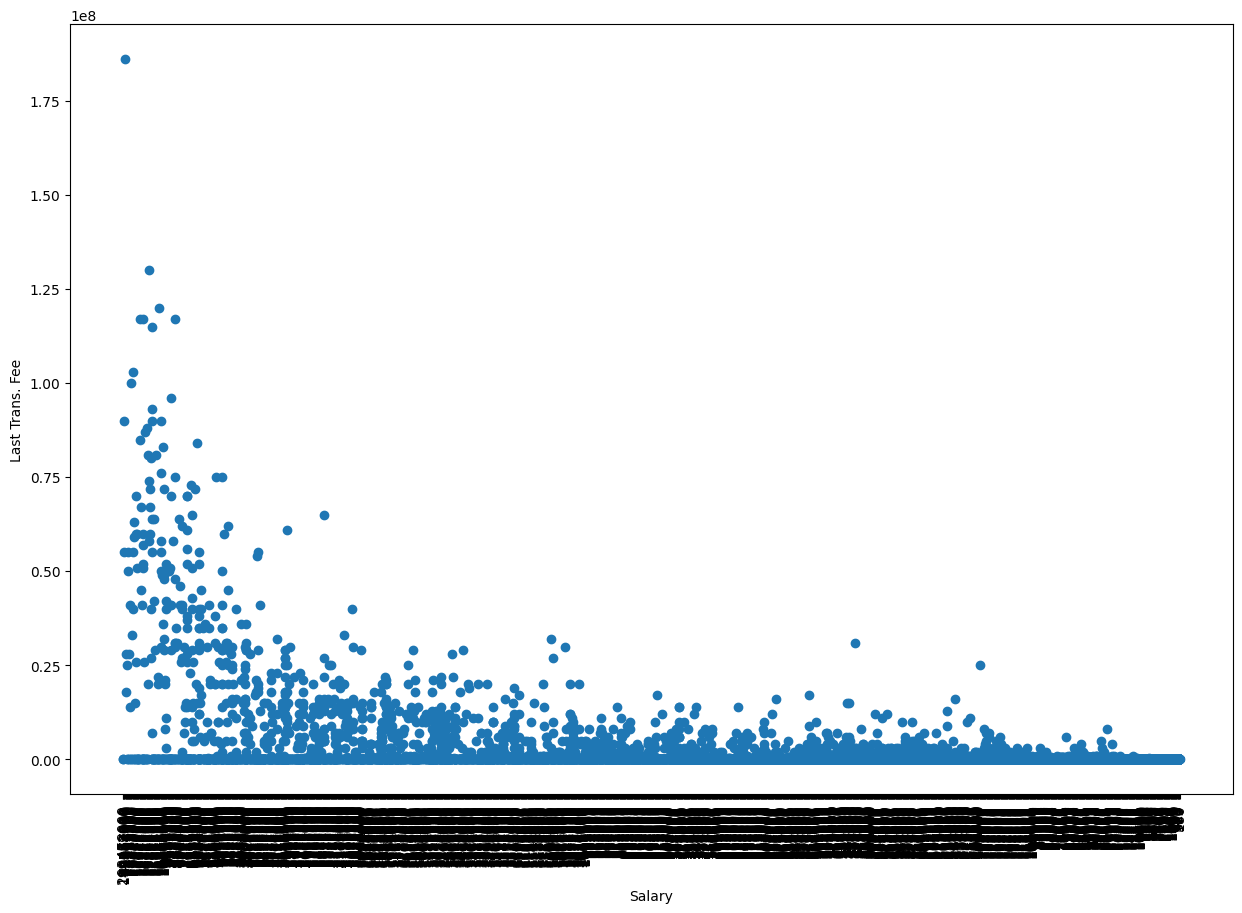

In [17]:
plt.figure(figsize=(15,10))
plt.scatter('Salary','Last Trans. Fee' , data=df)
plt.xticks(rotation=90)
plt.xlabel('Salary')
plt.ylabel('Last Trans. Fee')
plt.show()

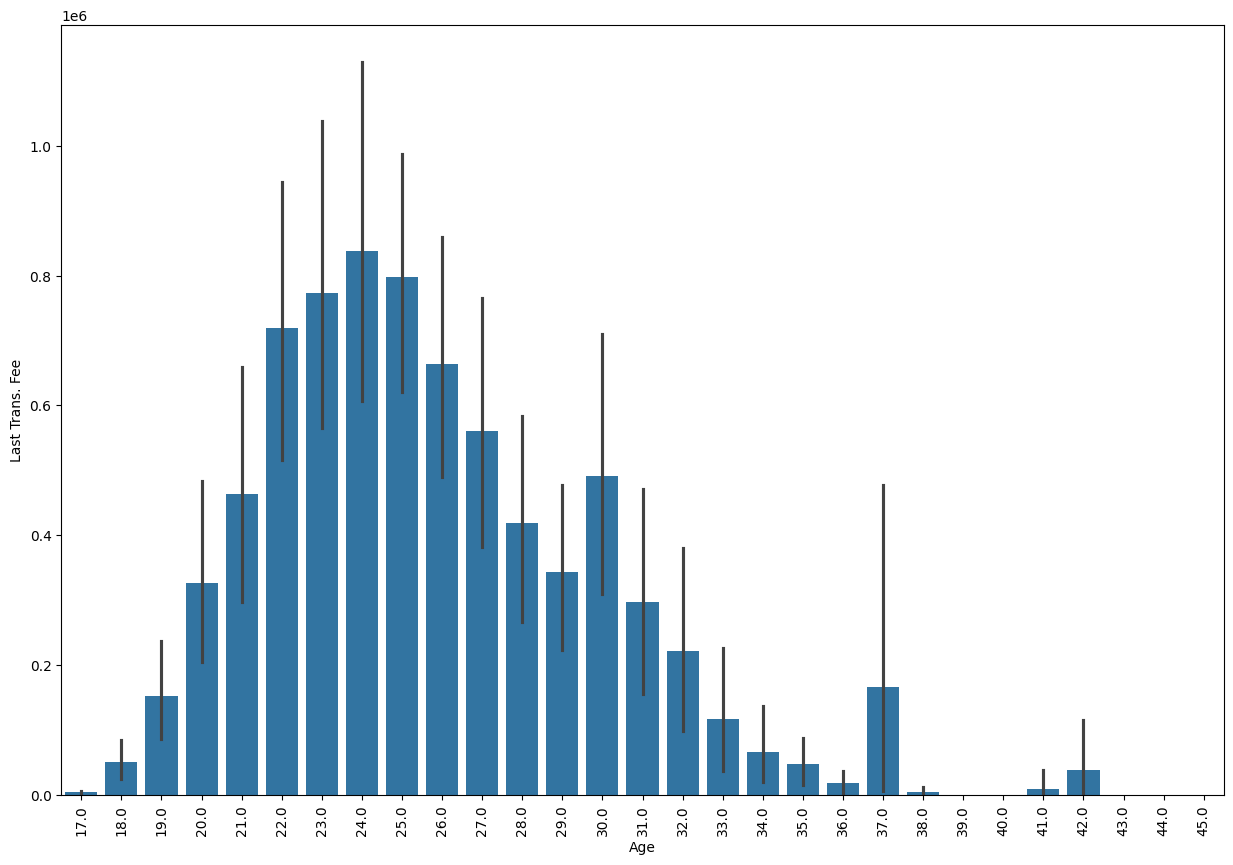

In [13]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Age', y='Last Trans. Fee', data=df)
plt.xticks(rotation= 90);

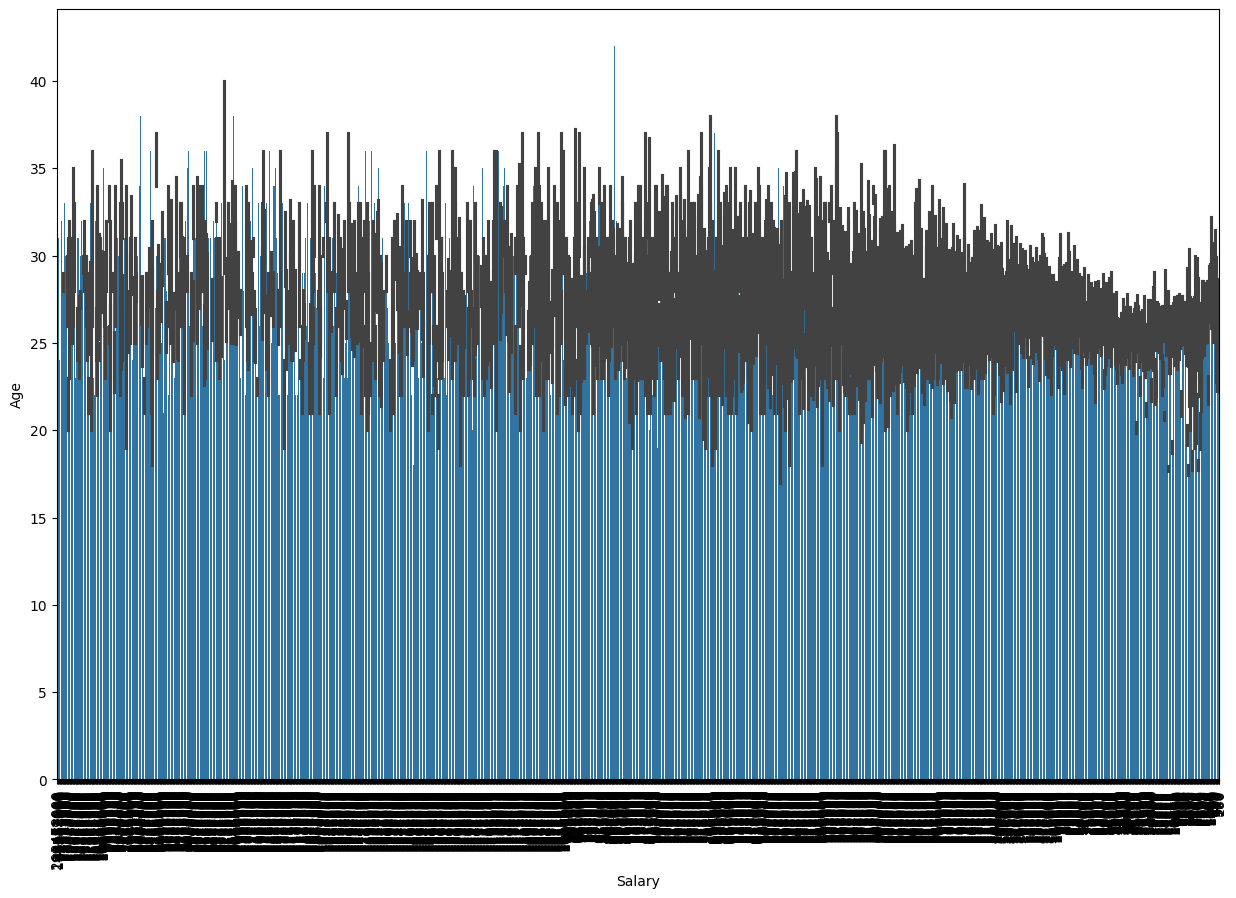

In [18]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Salary', y='Age', data=df)
plt.xticks(rotation= 90);

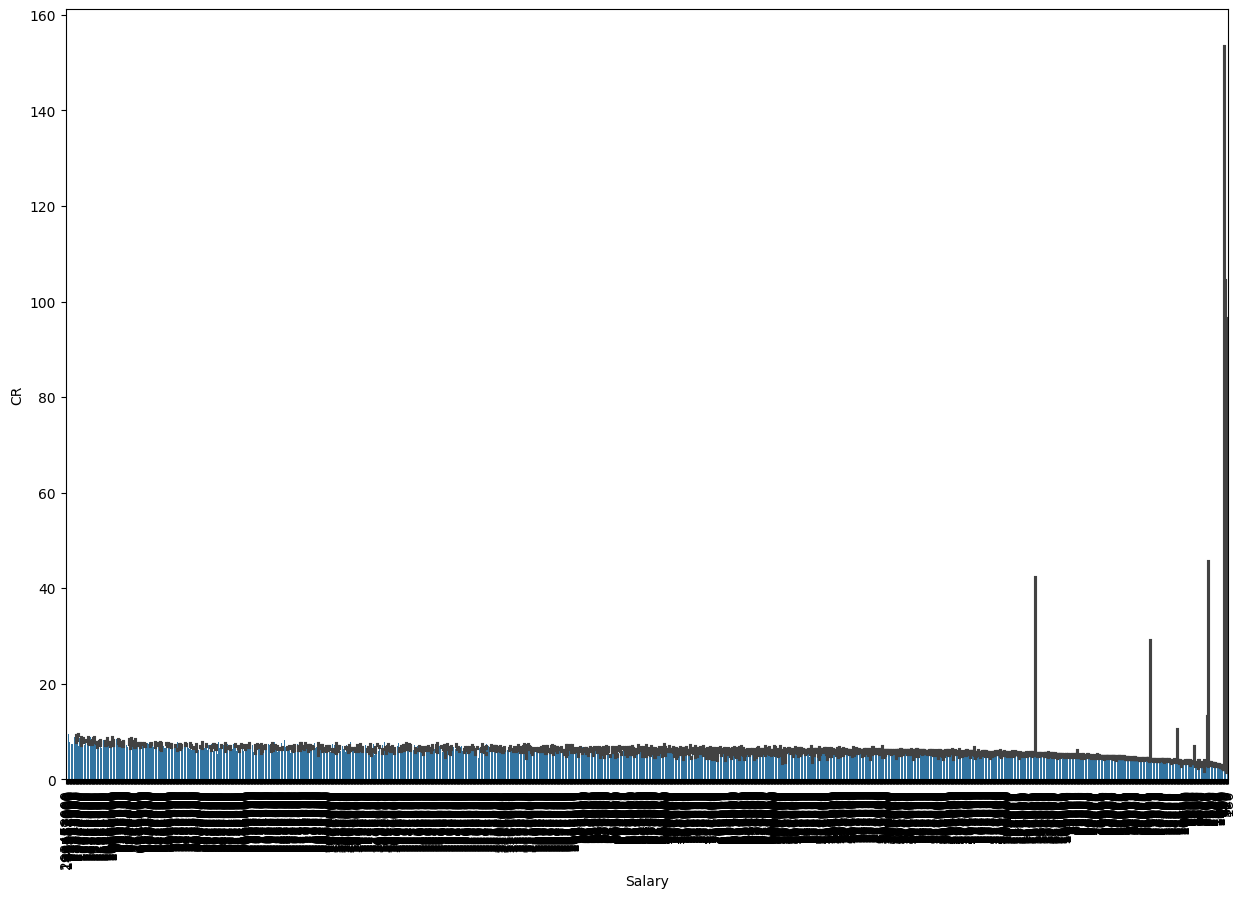

In [15]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Salary', y='CR', data=df)
plt.xticks(rotation= 90);

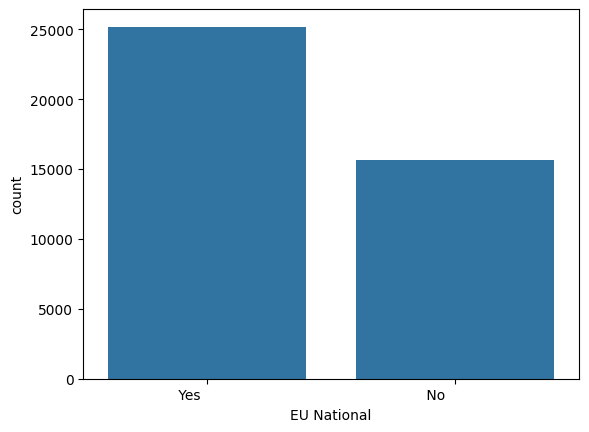

In [16]:
sns.countplot(x=df['EU National'], data=df)
plt.show(block=True)

# **Değişkenler Arası İlişkiler**
    Aşağıda bulunan korelasyon ilişkiler grafiğini yorumlar iken bu maddeleri kıstas alınmalıdır
*   +1: Mükemmel pozitif korelasyon. Bu, iki değişken arasında doğru orantılı bir ilişki olduğunu gösterir.
*   0: Korelasyon yok veya çok zayıf korelasyon. Bu, değişkenler arasında herhangi bir ilişki olmadığı veya çok zayıf bir ilişki olduğu anlamına gelir.
*   -1: Mükemmel negatif korelasyon. Bu, iki değişken arasında ters orantılı bir ilişki olduğunu gösterir.



### **1. Grafik yorumu**

*   Bu grafikte oyuncuların giydiği forma sayısı ile yaşları arasında korelasyon incelemesi yapılmıştır.
*   Bu incelemeye göre çıkan sonuç çok yüksek bir korelasyon olmasada bir ilişki olduğu tespit edilmiştir.



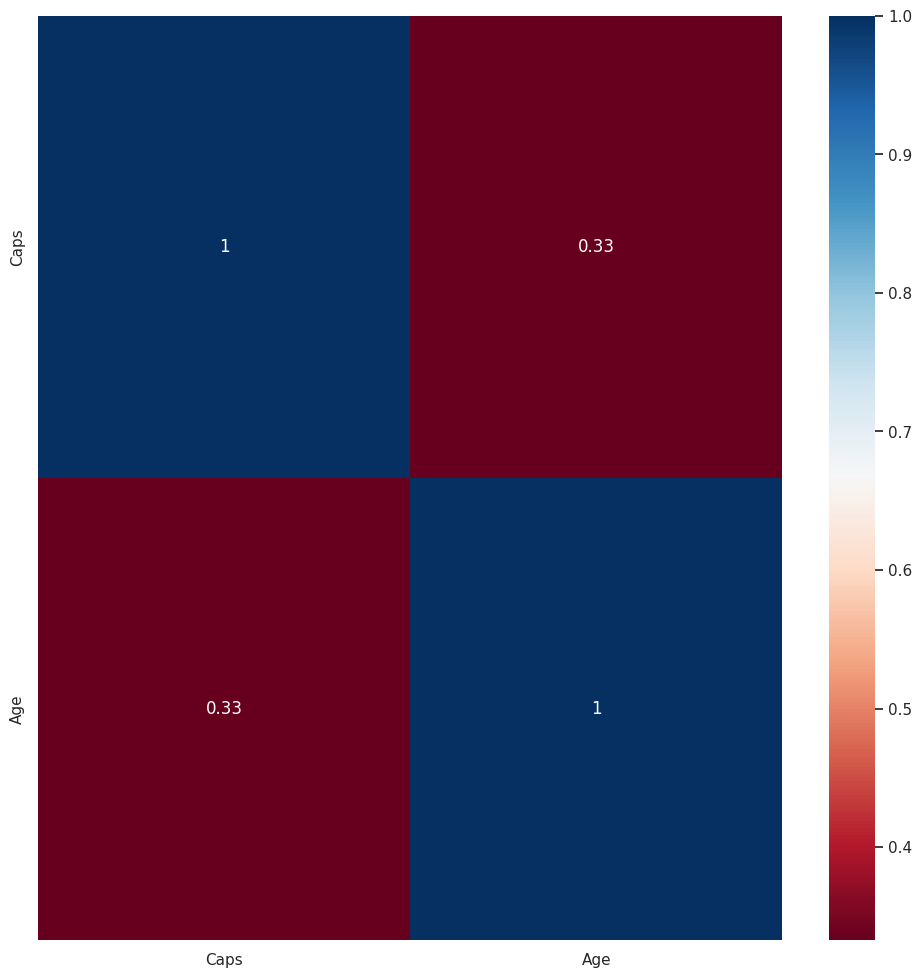

In [ ]:
corr = df[num_cols].corr()

sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)
plt.show()

### **2. Grafik yorumu**

*   Bu grafikte Oyuncuların Maaşları, Son transfer ücreti, forma sayısı ve yaşları arasında korelasyon incelemesi yapılmıştır.
*   Bu incelemeye göre çıkan sonuç

    1.   Oyuncunun Maaşları ile Son transfer ücreti arasında çok yüksek olmasada bir korelasyon tespit edilmiştir.
    2.   Oyuncunun Maaşları ile Forma giydiği maç sayısı arasında çok yüksek olmasada bir korelasyon tespit edilmiştir.
    3.   Oyuncun Maaşları ile Yaşları arasında nerede ise hiç korelasyon veya bir orantı bulunmamıştır.
    4.   Oyuncun Son transfer ücreti ile Forma giydikleri maç sayısı arasında nerede ise hiç korelasyon veya bir orantı bulunmamıştır.
    5.   Oyuncun Son transfer ücreti ile Yaş arasında hiç korelasyon  bulunmamıştır. (buradaki değer=0,00045)
    6.   Oyuncun Yaş ile Forma giydikleri maç sayısı arasında çok yüksek olmasada bir korelasyon tespit edilmiştir.

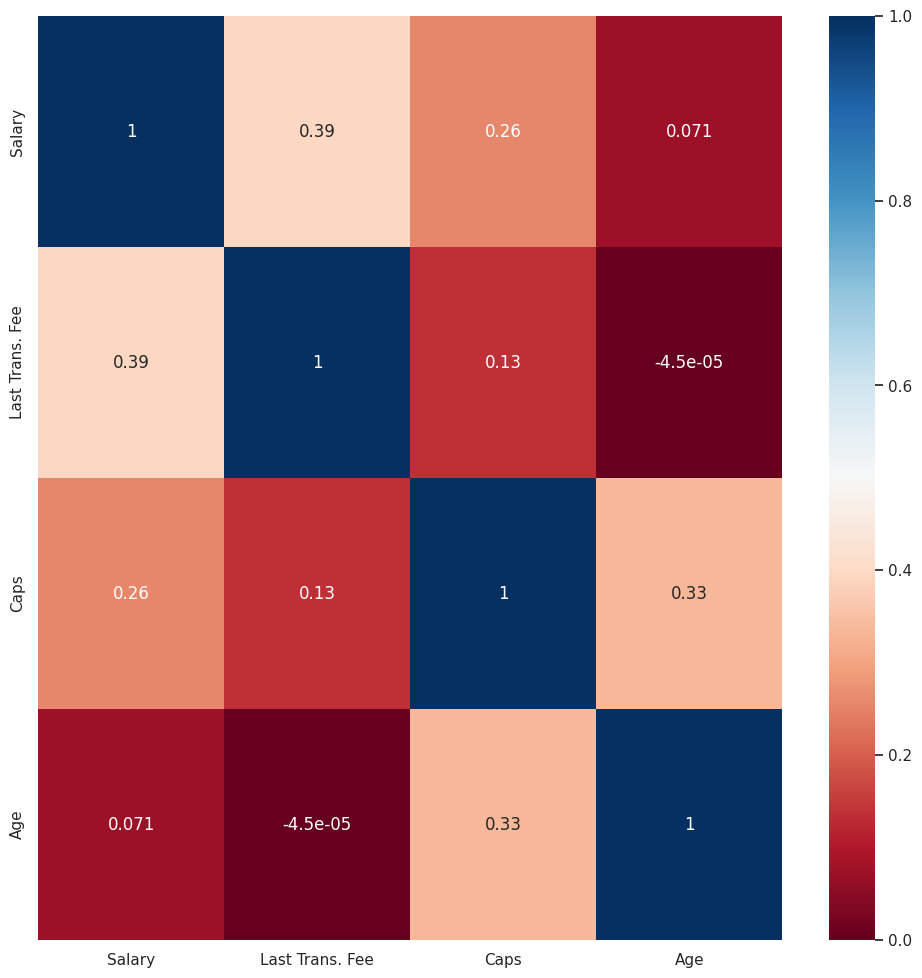

In [19]:
corr = df[['Salary','Last Trans. Fee', 'Caps', 'Age']].corr()

# Korelasyon haritasını oluşturalım
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)  # annot=True ile korelasyon değerlerini göster
plt.show()

### **3. Grafik yorumu**

*   Bu grafikte Oyuncuların Maaşları, Son transfer ücreti, forma sayısı, yaşları ve popülerlik endeksi arasında korelasyon incelemesi yapılmıştır.
*   Bu incelemeye göre 2. grafikten farklı olaraktan çıkan sonuçlar

    1.   Oyuncunun Popülerlik endeksi ile diğer değerler ile korelasyon yok kabul edilecek kadar düşük bulunmuştur.

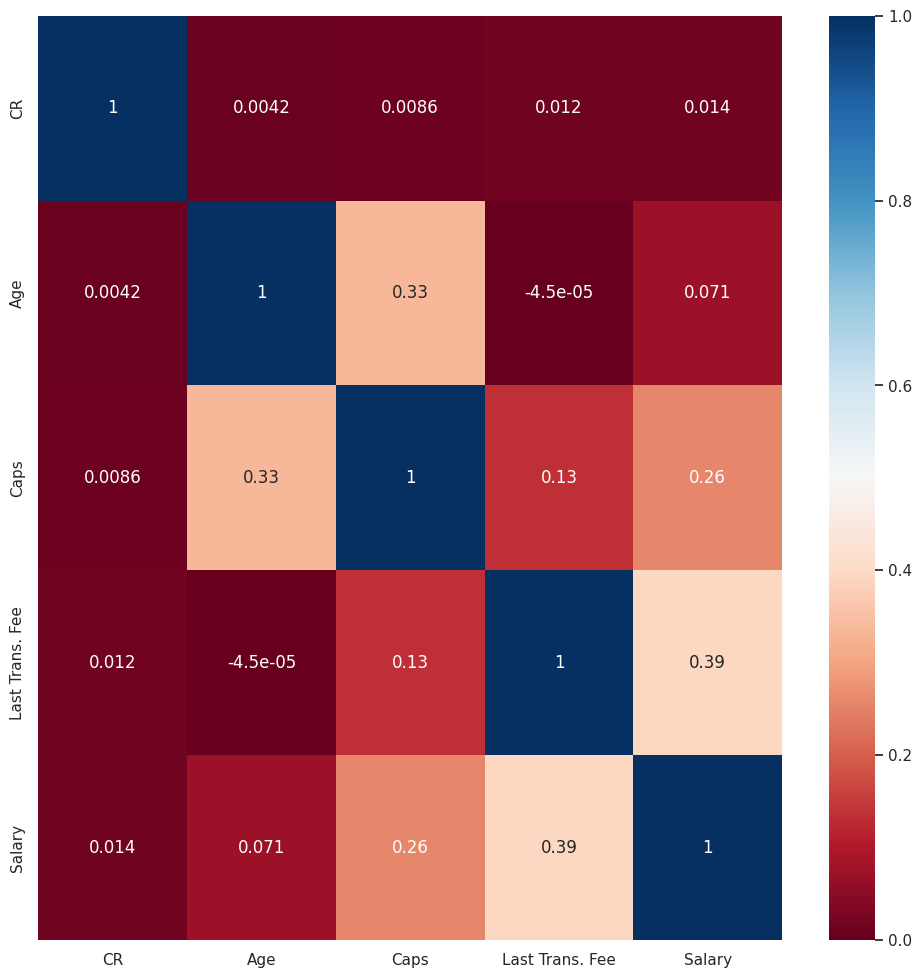

In [20]:
corr = df[['CR', 'Age', 'Caps', 'Last Trans. Fee', 'Salary']].corr()

# Korelasyon haritasını oluşturalım
sns.set(rc={'figure.figsize': (12, 12)})
sns.heatmap(corr, cmap="RdBu", annot=True)  # annot=True ile korelasyon değerlerini göster
plt.show()